## U-NSGA-III


The algorithm is implemented based on <cite data-cite="unsga3"></cite>. NSGA-III selects parents randomly for mating. It has been shown that tournament selection performs better than random selection. The *U* stands for *unified* and increases the performance of NSGA-III by introducing tournament pressure. 

The mating selections works as follows:


<div style="display: block;margin-left: auto;margin-right: auto;width: 45%;">
![unsga3_mating](../resources/images/unsga3_mating.png)
</div>

### Example

In [1]:
from pymoo.optimize import minimize
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymoo.factory import get_algorithm, get_problem

# create the reference directions to be used for the optimization
ref_dirs = UniformReferenceDirectionFactory(1, n_points=1).do()

# create the algorithm object
method = get_algorithm("unsga3",
                      pop_size=100,
                      ref_dirs=ref_dirs)

# execute the optimization
res = minimize(get_problem("ackley", n_var=30),
               method,
               termination=('n_gen', 150),
               save_history=True)

print("UNSGA3: Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

UNSGA3: Best solution found: 
X = [ 0.05667774  0.09703363  0.04923122 -0.08040344 -0.03932271 -0.1145985
 -0.03797646  0.02208251 -0.01323049  0.02727217  0.02208654 -0.05653669
 -0.06610067 -0.03598527 -0.00445027  0.04820077  0.03053568 -0.01416684
  0.02827751  0.08693726  0.00710278  0.02440053  0.02617389 -0.03690484
 -0.14428569 -0.0182757   0.03393292  0.10065527  0.02620279 -0.05734159]
F = [0.39556288]


U-NSGA-III has for single- and bi-objective problems a tournament pressure which is known to be useful.
In the following we provide a quick comparison (here just one run, so not a valid experiment), to see the difference in convergence.

In [2]:
_res = minimize(get_problem("ackley", n_var=30),
                get_algorithm("nsga3", pop_size=100, ref_dirs=ref_dirs),
               termination=('n_gen', 150),
               save_history=True)
print("NSGA3: Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

NSGA3: Best solution found: 
X = [ 0.05667774  0.09703363  0.04923122 -0.08040344 -0.03932271 -0.1145985
 -0.03797646  0.02208251 -0.01323049  0.02727217  0.02208654 -0.05653669
 -0.06610067 -0.03598527 -0.00445027  0.04820077  0.03053568 -0.01416684
  0.02827751  0.08693726  0.00710278  0.02440053  0.02617389 -0.03690484
 -0.14428569 -0.0182757   0.03393292  0.10065527  0.02620279 -0.05734159]
F = [0.39556288]


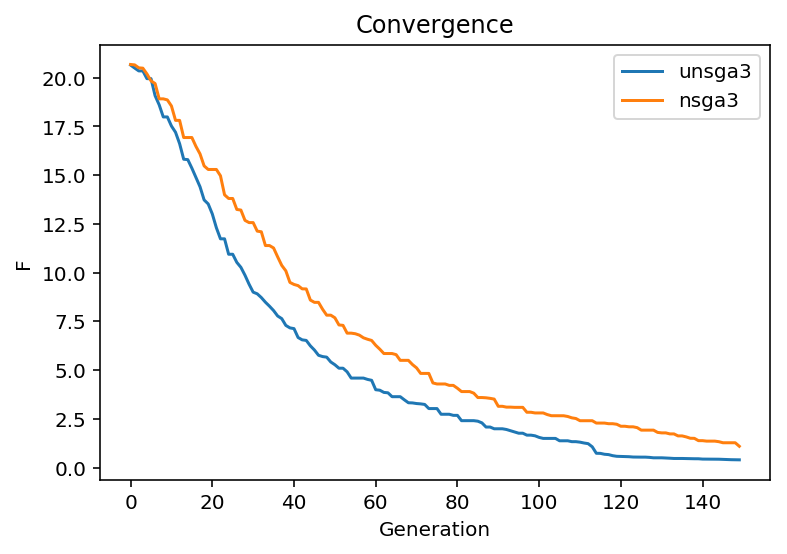

In [3]:
import numpy as np
import matplotlib.pyplot as plt

ret = [np.min(e.pop.get("F")) for e in res.history]
_ret = [np.min(e.pop.get("F")) for e in _res.history]

plt.plot(np.arange(len(ret)), ret, label="unsga3")
plt.plot(np.arange(len(_ret)), _ret, label="nsga3")
plt.title("Convergence")
plt.xlabel("Generation")
plt.ylabel("F")
plt.legend()
plt.show()